In [1]:
import json
from IPython.display import Markdown, display
from IPython.display import display_markdown, Image
from urllib.parse import quote
from datetime import datetime

In [2]:
from agents.graph import build_graph
from config import DEBUG_MODE, USE_RAW_CONTENT



In [3]:
%load_ext line_profiler

In [4]:
%load_ext autoreload
%autoreload 2

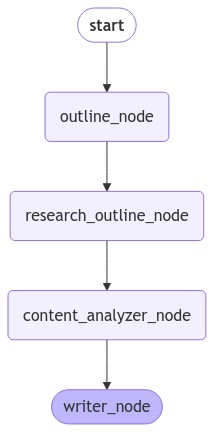

In [7]:
graph = build_graph()
with open("../../../agent-graph.png", "wb") as png:
    png.write(graph.get_graph().draw_mermaid_png())
Image(graph.get_graph().draw_mermaid_png())

In [8]:
# TASK = "Jidlo v dnesni dobe obsahuje hormony, kvuli kterym  zacinaji slecny mit menstruaci o nekolik let drive, nez by bylo prirozene."
# TASK = "Byl Chris Alderson MBE unesen nebo ohrozen Talibanem v Afganistanu?"
TASK = "Jiří Lexa a Kvantová cesta"
DEBUG_MODE


True

# Lambda Func Invoke

In [12]:
from handler import lambda_handler

In [9]:
task = quote(TASK)
language = 'cs'
task


'Ji%C5%99%C3%AD%20Lexa%20a%20Kvantov%C3%A1%20cesta'

In [10]:
event = {}
event["pathParameters"] = {
    "query": quote(task),
    "language": language,
    "config": {
        "use_raw_content": USE_RAW_CONTENT,
    },
    "version": "v1"
    }

In [11]:
result = lambda_handler(event, None)

In [12]:
body = json.loads(result['body'])

In [13]:
body

{'error': "'str' object has no attribute 'with_structured_output'"}

In [14]:
display(Markdown(body['content']))


KeyError: 'content'

# Nodes Invoke

In [51]:
from agents.nodes import outline_node
from agents.state import AgentState

In [52]:
state = AgentState()
state['task'] = TASK

In [53]:
outline = outline_node(state)['outline']
state['outline'] = outline
display_markdown(outline, raw=True)

### Outline: Jiří Lexa a Kvantová cesta

#### I. Úvod
   A. Představení Jiřího Lexy
      1. Osobní život a vzdělání
      2. Profesní dráha a význam v oblasti kvantové fyziky
   B. Definice kvantové cesty
      1. Co je kvantová cesta?
      2. Historie a vývoj konceptu

#### II. Jiří Lexa a jeho přínos k kvantové fyzice
   A. Klíčové výzkumné oblasti
      1. Kvantová mechanika
      2. Kvantové informace
      3. Aplikace kvantové fyziky v technologiích
   B. Významné publikace a studie
      1. Přehled nejdůležitějších prací
      2. Ocenění a uznání v oboru

#### III. Kvantová cesta: Teoretické základy
   A. Základní principy kvantové fyziky
      1. Superpozice a entanglement
      2. Kvantové stavy a měření
   B. Kvantové algoritmy a jejich aplikace
      1. Shorův algoritmus
      2. Groverův algoritmus

#### IV. Praktické aplikace kvantové fyziky
   A. Kvantové počítače
      1. Jak fungují kvantové počítače?
      2. Výhody oproti klasickým počítačům
   B. Kvantová kryptografie
      1. Principy kvantové bezpečnosti
      2. Příklady implementace v praxi

#### V. Výzvy a budoucnost kvantové fyziky
   A. Technologické a teoretické výzvy
      1. Stabilita kvantových systémů
      2. Škálovatelnost kvantových technologií
   B. Budoucí směry výzkumu
      1. Možnosti rozvoje kvantových technologií
      2. Interdisciplinární přístupy a spolupráce

#### VI. Závěr
   A. Shrnutí přínosu Jiřího Lexy k rozvoji kvantové fyziky
   B. Význam kvantové cesty pro budoucnost vědy a technologií
   C. Odkaz Jiřího Lexy pro další generace vědců a výzkumníků

In [11]:
outline = outline_node(state)['outline']
state['outline'] = outline
display_markdown(outline, raw=True)

**Outline for Fact-Checking Article: "Jiří Lexa a Kvantová cesta"**

**I. Introduction**
   - Briefly introduce Jiří Lexa and the concept of "Kvantová cesta" (Quantum Path).
   - State the purpose of the article: to fact-check claims surrounding Lexa and his work related to quantum theories.
   - Highlight the importance of addressing disinformation in scientific discussions.

**II. Background on Jiří Lexa**
   - Provide a short biography of Jiří Lexa, including his professional background and contributions to quantum physics.
   - Note any relevant affiliations or institutions he is associated with.

**III. Overview of "Kvantová cesta"**
   - Define "Kvantová cesta" and its significance in the context of quantum physics.
   - Explain any theories or concepts that Lexa has proposed or is associated with.

**IV. Claims and Controversies**
   - List specific claims made about Jiří Lexa and "Kvantová cesta" that have circulated in media or online platforms.
   - Identify any conspiracy theories or disinformation related to these claims.
   - Use bullet points for clarity and ease of reading.

**V. Fact-Checking the Claims**
   - For each claim listed in the previous section, provide:
     1. **Claim**: State the claim clearly.
     2. **Evidence**: Present factual evidence supporting or refuting the claim.
     3. **Expert Opinions**: Include insights from credible experts in quantum physics to validate or challenge the claims.
   - Ensure each claim is addressed in a logical order.

**VI. Analysis of Disinformation Tactics**
   - Discuss common tactics used in spreading disinformation related to scientific topics, particularly in quantum physics.
   - Highlight how these tactics have been applied to the narrative surrounding Jiří Lexa and "Kvantová cesta."

**VII. Conclusion**
   - Summarize the findings of the fact-checking process.
   - Emphasize the importance of critical thinking and verification in scientific discourse.
   - Encourage readers to seek credible sources when encountering claims about scientific figures and theories.

**VIII. Call to Action**
   - Invite readers to share the article to combat misinformation.
   - Suggest following reputable scientific organizations and fact-checking platforms for accurate information.

**Notes for Writer:**
- Maintain an objective tone throughout the article.
- Use clear, accessible language to ensure understanding by a broad audience.
- Include hyperlinks to credible sources where applicable for further reading.
- Ensure all claims are backed by verifiable evidence and expert consensus.

In [62]:
from agents.nodes import research_outline_node
state['target_language'] = 'cs'
state['config'] = {
    "use_raw_content": USE_RAW_CONTENT,
}


In [63]:
response = research_outline_node(state)
state['content'] = response['content']
state['references'] = response['references']
response['queries']

['Jiří Lexa kvantová fyzika osobní život a vzdělání',
 'Jiří Lexa přínos kvantové mechaniky a kvantových informací',
 'historie a vývoj kvantové cesty v kvantové fyzice',
 'praktické aplikace kvantové fyziky kvantové počítače a kryptografie',
 'výzvy a budoucnost kvantové fyziky Jiří Lexa']

In [43]:
response = research_outline_node(state)
response['queries']

['Jiří Lexa kvantová fyzika osobní život a vzdělání',
 'Jiří Lexa kvantová cesta významné publikace a projekty',
 'historie kvantové cesty a její klíčové principy',
 'aplikace kvantové cesty v technologiích a vědeckých oborech',
 'výzvy a budoucnost kvantové fyziky Jiří Lexa']

In [33]:
response = research_outline_node(state)
state['content'] = response['content']
state['references'] = response['references']
response['queries']

['Jiří Lexa kvantová cesta fakta',
 'Jiří Lexa biografie a přínos k fyzice',
 'Kvantová cesta a její význam v kvantové fyzice',
 'dezinformace o Jiřím Lexovi a kvantové cestě',
 'vědecké názory na Jiřího Lexu a kvantovou cestu']

In [45]:
print(list(state['content'])[1])

{'ref_num': 1, 'search_query': 'Jiří Lexa kvantová cesta fakta', 'content': {'title': 'Kvantová cesta', 'url': 'https://kvantovacesta.cz/', 'content': 'Co je to Kvantová cesta? Když Vám řekneme, že si svůj život vytváříte sami a je pouze na Vás, zda se rozhodnete žít šťastný a spokojený život, Váš rozum začne předhazovat desítky argumentů, proč je to nesmysl. Bude Vás chtít držet v roli bezmocné oběti. Jste nespokojeni a rozum hodí vinu na nepříznivý osud, na ...', 'score': 0.9818405, 'raw_content': 'Přihlášení do klientské zóny\nNevadí, zašleme vám nové heslo na mail\nÚvodní stránka\nCo je to Kvantová cesta?\nKdyž Vám řekneme, že si svůj život vytváříte sami a je pouze na Vás, zda se rozhodnete žít šťastný a spokojený život, Váš rozum začne předhazovat desítky argumentů, proč je to nesmysl. Bude Vás chtít držet v roli bezmocné oběti. Jste nespokojeni a rozum hodí vinu na nepříznivý osud, na blbou a nejistou dobu, případně z toho obviní rodiče, partnera a další lidi v okolí. Jindy za t

In [56]:
from agents.nodes import content_analyzer_node

In [65]:
response = content_analyzer_node(state)
state['controversies'] = response['controversies']
response

BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 128000 tokens. However, your messages resulted in 167563 tokens (167519 in the messages, 44 in the functions). Please reduce the length of the messages or functions.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}

In [60]:
from agents.nodes import writer_node
response = writer_node(state)
display_markdown(response['draft'], raw=True)


In [61]:
display_markdown(response['draft'], raw=True)


# Jiří Lexa a Kvantová cesta

## Úvod do tématu

Jiří Lexa je český lektor, terapeut a inspirátor, který se specializuje na kvantovou fyziku a její aplikace v osobním rozvoji. Jeho přístup k kvantování, což je metoda, která se snaží propojit principy kvantové fyziky s osobním rozvojem, vyvolává různé názory a diskuse. V tomto textu se zaměříme na klíčové aspekty jeho práce, včetně kontroverzí, které se kolem něj objevují.

## Kvantování jako metoda osobního rozvoje

Kvantování je metoda, která se snaží využít principy kvantové fyziky k osobnímu rozvoji. Lexa tvrdí, že naše myšlenky a víra mohou ovlivnit naši realitu. Tento přístup je však kritizován jako zjednodušený a neodborný. Skeptici poukazují na to, že kvantová fyzika se zabývá chováním subatomárních částic a nelze ji přímo aplikovat na každodenní život a psychologii. Na druhou stranu, příznivci kvantování tvrdí, že vědomé zaměření na pozitivní myšlenky může vést k lepšímu životnímu stylu a zdraví.

## Vliv myšlenek na realitu podle kvantové fyziky

Jedním z hlavních tvrzení Jiřího Lexy je, že myšlenkami si tvoříme svou realitu. Tento koncept je populární v oblasti osobního rozvoje, avšak odborníci varují před jeho zjednodušením. Kvantová fyzika skutečně ukazuje, že pozorování může ovlivnit chování částic, ale extrapolace těchto principů na lidské myšlení a chování je sporná. Je důležité rozlišovat mezi vědeckými fakty a populárními interpretacemi, které mohou být zavádějící.

## Kvantová terapie a její účinnost

Kvantová terapie, jak ji propaguje Jiří Lexa, se zaměřuje na práci s kvantovým polem a skrytými zraněními, která si lidé nesou z dětství. Zatímco někteří lidé hlásí pozitivní zkušenosti a zlepšení svého psychického stavu, vědecké důkazy o účinnosti těchto metod jsou omezené. Kritici poukazují na nedostatek rigorózních studií, které by potvrdily účinnost kvantové terapie, a varují před jejím používáním jako náhrady za tradiční léčebné metody.

## Vztah mezi kvantovou fyzikou a osobním rozvojem

Vztah mezi kvantovou fyzikou a osobním rozvojem je předmětem mnoha debat. Zatímco někteří odborníci tvrdí, že kvantová fyzika může poskytnout nové pohledy na lidské vědomí a realitu, jiní varují před nebezpečím zjednodušování a mystifikace vědeckých principů. Je důležité přistupovat k těmto tématům kriticky a s otevřenou myslí, ale také s respektem k vědeckým metodám a důkazům.

## Mýty a fakta o kvantové fyzice v populární kultuře

Kvantová fyzika je často zmiňována v populární kultuře, což vede k mnoha mýtům a nedorozuměním. Například, myšlenka, že "myšlenky tvoří realitu", je zjednodušením složitých vědeckých konceptů. Je důležité rozlišovat mezi skutečnými vědeckými poznatky a populárními interpretacemi, které mohou být zavádějící. Vědecká komunita se snaží tyto mýty vyvracet a zdůrazňuje, že kvantová fyzika se zabývá chováním částic na subatomární úrovni, nikoli přímo lidským myšlením nebo chováním.

## Závěr

Jiří Lexa a jeho přístup k kvantové fyzice a osobnímu rozvoji vyvolávají různé názory a diskuse. Zatímco někteří lidé nacházejí v jeho metodách inspiraci a pomoc, jiní varují před nebezpečím zjednodušování a nedostatku vědeckých důkazů. Je důležité přistupovat k těmto tématům s otevřenou myslí, ale také s kritickým pohledem na vědecké poznatky a jejich aplikaci v každodenním životě.

In [25]:
display_markdown(state['outline'], raw=True)


**Outline for Fact-Checking Article: "Jiří Lexa a Kvantová cesta"**

**I. Introduction**
   - Briefly introduce Jiří Lexa and the concept of "Kvantová cesta" (Quantum Path).
   - State the purpose of the article: to fact-check claims surrounding Lexa and his work related to quantum theories.
   - Highlight the importance of addressing disinformation in scientific discussions.

**II. Background on Jiří Lexa**
   - Provide a short biography of Jiří Lexa, including his professional background and contributions to quantum physics.
   - Note any relevant affiliations or institutions he is associated with.

**III. Overview of "Kvantová cesta"**
   - Define "Kvantová cesta" and its significance in the context of quantum physics.
   - Explain any theories or concepts that Lexa has proposed or is associated with.

**IV. Claims and Controversies**
   - List specific claims made about Jiří Lexa and "Kvantová cesta" that have circulated in media or online platforms.
   - Identify any conspiracy theories or disinformation related to these claims.
   - Use bullet points for clarity and ease of reading.

**V. Fact-Checking the Claims**
   - For each claim listed in the previous section, provide:
     1. **Claim**: State the claim clearly.
     2. **Evidence**: Present factual evidence supporting or refuting the claim.
     3. **Expert Opinions**: Include insights from credible experts in quantum physics to validate or challenge the claims.
   - Ensure each claim is addressed in a logical order.

**VI. Analysis of Disinformation Tactics**
   - Discuss common tactics used in spreading disinformation related to scientific topics, particularly in quantum physics.
   - Highlight how these tactics have been applied to the narrative surrounding Jiří Lexa and "Kvantová cesta."

**VII. Conclusion**
   - Summarize the findings of the fact-checking process.
   - Emphasize the importance of critical thinking and verification in scientific discourse.
   - Encourage readers to seek credible sources when encountering claims about scientific figures and theories.

**VIII. Call to Action**
   - Invite readers to share the article to combat misinformation.
   - Suggest following reputable scientific organizations and fact-checking platforms for accurate information.

**Notes for Writer:**
- Maintain an objective tone throughout the article.
- Use clear, accessible language to ensure understanding by a broad audience.
- Include hyperlinks to credible sources where applicable for further reading.
- Ensure all claims are backed by verifiable evidence and expert consensus.

# Jiří Lexa a Kvantová cesta

## I. Úvod

### A. Představení Jiřího Lexy
Jiří Lexa je český lektor, terapeut a inspirátor, který se specializuje na kvantovou fyziku a osobní rozvoj. Od dětství měl různé vize a zážitky, které ho vedly k hlubšímu zkoumání reality a jeho vlastního vnitřního světa. Po absolvování vzdělání v oblasti psychologie a osobního rozvoje se stal uznávaným odborníkem v oblasti kvantového myšlení a terapie.

### B. Definice kvantové cesty
Kvantová cesta je koncept, který se zaměřuje na využití principů kvantové fyziky pro osobní rozvoj a transformaci. Tento přístup se snaží propojit vědecké poznatky s duchovním a psychologickým rozvojem jednotlivce. Historie kvantové cesty sahá do počátku 20. století, kdy byly položeny základy kvantové mechaniky, a postupně se vyvinula v moderní praxi, která zahrnuje techniky jako kvantové léčení a osobní transformaci.

## II. Jiří Lexa a jeho přínos k kvantové fyzice

### A. Klíčové výzkumné oblasti
Jiří Lexa se zaměřuje na několik klíčových oblastí v rámci kvantové fyziky:
1. **Kvantová mechanika** - Zkoumá základní principy, jako jsou superpozice a entanglement, a jejich aplikace v osobním rozvoji.
2. **Kvantové informace** - Analyzuje, jak informace fungují na kvantové úrovni a jak mohou ovlivnit naše vnímání reality.
3. **Aplikace kvantové fyziky v technologiích** - Lexa se věnuje i praktickým aplikacím, jako jsou kvantové počítače a kryptografie.

### B. Významné publikace a studie
Jiří Lexa publikoval řadu článků a studií, které se zabývají kvantovou fyzikou a jejím vlivem na osobní rozvoj. Jeho práce byly oceněny v odborných kruzích a přispěly k popularizaci kvantových principů v oblasti psychologie a terapie.

## III. Kvantová cesta: Teoretické základy

### A. Základní principy kvantové fyziky
1. **Superpozice a entanglement** - Tyto koncepty ukazují, jak mohou být kvantové stavy vzájemně propojeny a jak mohou ovlivnit naše vnímání reality.
2. **Kvantové stavy a měření** - Měření kvantových stavů je klíčové pro pochopení, jak naše myšlenky a víra mohou ovlivnit realitu.

### B. Kvantové algoritmy a jejich aplikace
1. **Shorův algoritmus** - Tento algoritmus umožňuje efektivní faktorizaci čísel, což má důsledky pro kryptografii.
2. **Groverův algoritmus** - Umožňuje rychlé vyhledávání v neuspořádaných databázích, což ukazuje na potenciál kvantových počítačů.

## IV. Praktické aplikace kvantové fyziky

### A. Kvantové počítače
1. **Jak fungují kvantové počítače?** - Využívají kvantové bity (qubity), které mohou existovat v superpozici, což umožňuje provádět výpočty mnohem rychleji než klasické počítače.
2. **Výhody oproti klasickým počítačům** - Kvantové počítače mají potenciál řešit složité problémy, které jsou pro klasické počítače neřešitelné.

### B. Kvantová kryptografie
1. **Principy kvantové bezpečnosti** - Využívá kvantové mechaniky k zajištění bezpečné komunikace a detekce odposlouchávání.
2. **Příklady implementace v praxi** - Kvantová kryptografie se již používá v některých bankovních a vládních systémech.

## V. Výzvy a budoucnost kvantové fyziky

### A. Technologické a teoretické výzvy
1. **Stabilita kvantových systémů** - Udržení stability kvantových stavů je klíčové pro úspěšné fungování kvantových technologií.
2. **Škálovatelnost kvantových technologií** - Vývoj škálovatelných kvantových systémů je stále výzvou pro vědce.

### B. Budoucí směry výzkumu
1. **Možnosti rozvoje kvantových technologií** - Očekává se, že kvantové technologie budou mít široké uplatnění v různých oblastech, včetně medicíny a umělé inteligence.
2. **Interdisciplinární přístupy a spolupráce** - Spolupráce mezi různými obory může přinést nové perspektivy a inovace v oblasti kvantové fyziky.

## VI. Závěr

### A. Shrnutí přínosu Jiřího Lexy k rozvoji kvantové fyziky
Jiří Lexa přispěl k popularizaci a aplikaci kvantových principů v osobním rozvoji a terapii, čímž otevřel nové možnosti pro jednotlivce hledající změnu a transformaci.

### B. Význam kvantové cesty pro budoucnost vědy a technologií
Kvantová cesta ukazuje, jak mohou být vědecké poznatky integrovány do osobního rozvoje, což může mít dalekosáhlé důsledky pro budoucnost vědy a technologií.

### C. Odkaz Jiřího Lexy pro další generace vědců a výzkumníků
Lexův přístup k kvantové fyzice a osobnímu rozvoji inspiruje nové generace vědců a terapeutů, aby zkoumali a využívali kvantové principy ve svých oborech.

In [40]:
display_markdown(response['draft'], raw=True)


# Jiří Lexa a Kvantová cesta: Faktická kontrola

## I. Úvod
Jiří Lexa je český lektor a terapeut, který se specializuje na koncept známý jako "Kvantová cesta". Tento článek se zaměřuje na faktickou kontrolu tvrzení týkajících se Lexy a jeho práce v oblasti kvantových teorií. Je důležité se zabývat dezinformacemi v diskusích o vědeckých tématech, aby se zajistila přesnost a důvěryhodnost informací.

## II. Pozadí Jiřího Lexy
Jiří Lexa se narodil 6. ledna 1941 v Ostravě. Od dětství měl různé vize a zážitky, které ho dovedly k tomu, že se stal lektorem kvantování a kvantovým terapeutem. Lexa se věnuje osobnímu rozvoji a pomáhá lidem porozumět jejich vnitřním zraněním a potenciálu [2][3].

## III. Přehled "Kvantové cesty"
"Kvantová cesta" je koncept, který tvrdí, že si lidé mohou sami vytvářet svůj život a že jejich myšlenky a pocity mají vliv na jejich realitu. Lexa zdůrazňuje, že život reaguje na naše vnitřní nastavení a vibrace, které vyzařujeme [1][22].

## IV. Tvrzení a kontroverze
Následující tvrzení o Jiřím Lexovi a "Kvantové cestě" se objevila v médiích a na online platformách:

- **Tvrzení 1**: Jiří Lexa se stal lektorem kvantování, kvantovým terapeutem.
- **Tvrzení 2**: "Kvantová cesta" je o tom, že si svůj život vytváříte sami.
- **Tvrzení 3**: Váš rozum začne předhazovat desítky argumentů, proč je to nesmysl.
- **Tvrzení 4**: Lexa pochopil, že vše tkví v hlavě.
- **Tvrzení 5**: Život reaguje na naše myšlenky a pocity, z nichž se utváří naše unikátní vibrace.

## V. Faktická kontrola tvrzení
### Tvrzení 1
**Tvrzení**: Jiří Lexa se stal lektorem kvantování, kvantovým terapeutem.  
**Důkaz**: Lexa se skutečně stal lektorem a terapeutem v oblasti kvantování, což potvrzují jeho vlastní vyjádření a články o jeho práci [0][2].

### Tvrzení 2
**Tvrzení**: "Kvantová cesta" je o tom, že si svůj život vytváříte sami.  
**Důkaz**: Tento koncept je součástí Lexova učení a je široce diskutován v jeho seminářích a článcích [1][22].

### Tvrzení 3
**Tvrzení**: Váš rozum začne předhazovat desítky argumentů, proč je to nesmysl.  
**Důkaz**: Lexa se v rámci své filozofie zabývá překonáváním vnitřních bloků a skeptických myšlenek, což je v souladu s jeho učením [1].

### Tvrzení 4
**Tvrzení**: Lexa pochopil, že vše tkví v hlavě.  
**Důkaz**: Lexa zdůrazňuje, že naše myšlení a vnitřní nastavení mají zásadní vliv na naše životy, což je klíčovým prvkem jeho učení [3][22].

### Tvrzení 5
**Tvrzení**: Život reaguje na naše myšlenky a pocity, z nichž se utváří naše unikátní vibrace.  
**Důkaz**: Tento názor je součástí Lexova učení a je podporován jeho přístupem k osobnímu rozvoji [1][22].

## VI. Analýza dezinformačních taktik
Dezinformace v oblasti vědy často zahrnují zkreslování faktů, selektivní prezentaci informací a manipulaci s kontextem. V případě Jiřího Lexy a "Kvantové cesty" se objevují snahy o zpochybnění jeho metod a učení, přičemž se ignorují pozitivní zkušenosti lidí, kteří jeho přístup vyzkoušeli [15][16].

## VII. Závěr
Faktická kontrola ukazuje, že tvrzení o Jiřím Lexovi a "Kvantové cestě" mají oporu v jeho práci a filozofii. Je důležité přistupovat k vědeckým diskusím s kritickým myšlením a ověřovat informace z důvěryhodných zdrojů.

## VIII. Výzva k akci
Sdílejte tento článek, abyste pomohli bojovat proti dezinformacím. Sledujte renomované vědecké organizace a platformy pro faktickou kontrolu, abyste získali přesné informace o vědeckých osobnostech a teoriích.

In [26]:
display_markdown(response['draft'], raw=True)


# Jiří Lexa a Kvantová cesta: Faktická kontrola

## I. Úvod
Jiří Lexa je český terapeut a lektor, který se zaměřuje na koncept "Kvantová cesta". Tento přístup spojuje kvantovou fyziku s osobním rozvojem a terapií. Cílem tohoto článku je prověřit tvrzení týkající se Lexy a jeho práce v oblasti kvantových teorií. Je důležité se zabývat dezinformacemi v diskusích o vědeckých tématech, aby se zajistila přesnost a důvěryhodnost informací.

## II. Pozadí Jiřího Lexy
Jiří Lexa se od dětství potýkal s různými vizemi a zážitky, které ho dovedly k tomu, aby se stal lektorem kvantování a kvantovým terapeutem. Vystudoval hudbu a psychologii a více než dvacet let působil jako profesionální voják. Po ukončení vojenské kariéry se začal věnovat osobnímu rozvoji a léčitelství, což vedlo k jeho současné praxi.

## III. Přehled "Kvantové cesty"
"Kvantová cesta" je koncept, který se zaměřuje na využívání poznatků kvantové fyziky k osobnímu rozvoji. Lexa tvrdí, že lidé mohou tvořit svou realitu prostřednictvím svých myšlenek a emocí, což je spojeno s principy kvantového pole. Tento přístup se snaží přiblížit kvantovou fyziku široké veřejnosti a ukázat, jak ji lze aplikovat v každodenním životě.

## IV. Tvrzení a kontroverze
- **Tvrzení**: Jiří Lexa tvrdí, že kvantové pole může pomoci uzdravovat a tvořit život tak, jak chceme.
- **Tvrzení**: Lexa spojuje kvantovou fyziku s osobním rozvojem a terapií, což může být považováno za ezoteriku.
- **Tvrzení**: Kvantování je prezentováno jako metoda, která může zlepšit život a přitáhnout pozitivní situace, což je spojeno se zákonem přitažlivosti.
- **Tvrzení**: Jiří Lexa tvrdí, že každý zvuk má specifickou vibraci, která může ovlivnit zdraví jednotlivce.
- **Tvrzení**: Kvantová cesta je prezentována jako způsob, jak si lidé mohou tvořit svou realitu skrze myšlenky a emoce.

## V. Faktická kontrola tvrzení
1. **Tvrzení**: Jiří Lexa tvrdí, že kvantové pole může pomoci uzdravovat a tvořit život tak, jak chceme.
   - **Důkaz**: Lexa se odvolává na kvantovou fyziku a její aplikaci v terapii, avšak vědecká komunita obecně považuje tyto tvrzení za kontroverzní a nedostatečně podložené [0][1].

2. **Tvrzení**: Lexa spojuje kvantovou fyziku s osobním rozvojem a terapií, což může být považováno za ezoteriku.
   - **Důkaz**: Mnozí odborníci na kvantovou fyziku varují před zjednodušováním a spojováním kvantových teorií s ezoterickými praktikami, což může vést k dezinformacím [8][11].

3. **Tvrzení**: Kvantování je prezentováno jako metoda, která může zlepšit život a přitáhnout pozitivní situace, což je spojeno se zákonem přitažlivosti.
   - **Důkaz**: Zákon přitažlivosti je populární koncept, avšak jeho vědecké opodstatnění je sporné a mnozí vědci ho považují za pseudovědu [10][12].

4. **Tvrzení**: Jiří Lexa tvrdí, že každý zvuk má specifickou vibraci, která může ovlivnit zdraví jednotlivce.
   - **Důkaz**: Ačkoli existují studie o vlivu zvuku na psychiku a zdraví, Lexova tvrzení o specifických vibracích a jejich účincích na zdraví nejsou dostatečně podložena vědeckými důkazy [3][4].

5. **Tvrzení**: Kvantová cesta je prezentována jako způsob, jak si lidé mohou tvořit svou realitu skrze myšlenky a emoce.
   - **Důkaz**: Tento koncept je v souladu s některými psychologickými teoriemi, avšak jeho aplikace v kontextu kvantové fyziky je problematická a často kritizována [9][11].

## VI. Analýza dezinformačních taktik
Dezinformace v oblasti vědy často zahrnují zjednodušování složitých konceptů, manipulaci s kontextem a vytváření falešných spojení mezi vědeckými teoriemi a ezoterickými praktikami. V případě Jiřího Lexy a "Kvantové cesty" se objevují prvky, které mohou vést k mylným představám o kvantové fyzice a jejích aplikacích v osobním rozvoji [13][15].

## VII. Závěr
Faktická kontrola ukazuje, že tvrzení Jiřího Lexy o "Kvantové cestě" a jejích přínosech jsou často sporná a nedostatečně podložená. Je důležité přistupovat k těmto informacím kriticky a ověřovat je z důvěryhodných zdrojů.

## VIII. Výzva k akci
Sdílejte tento článek, abyste pomohli bojovat proti dezinformacím. Sledujte renomované vědecké organizace a platformy pro ověřování faktů, abyste získali přesné informace o vědeckých tématech.

In [30]:
display_markdown(response['draft'], raw=True)


# Jiří Lexa a Kvantová cesta: Faktická kontrola

## I. Úvod
Tento článek se zaměřuje na Jiřího Lexu a koncept "Kvantová cesta". Cílem je objasnit a vyvrátit potenciální dezinformace a mýty, které se kolem těchto témat objevují. Je důležité se zabývat těmito otázkami, abychom zajistili, že veřejnost má přístup k přesným a ověřeným informacím.

## II. Kdo je Jiří Lexa?
Jiří Lexa se narodil 23. prosince 1941 v Českých Budějovicích [0]. Je známý jako překladatel z ruštiny a angličtiny, dramaturg a dabér. V letech 1977-2004 pracoval v dabingovém studiu ČST/ČT Praha a také v soukromých studiích [1]. Jeho profesní dráha zahrnuje práci v různých divadlech, včetně Národního divadla v Praze [1]. 

Je důležité vyvrátit mýtus, že Jiří Lexa se narodil 6. ledna 1941 v Ostravě, což je nesprávná informace [2][3][4]. Tato nepřesnost může vyplývat z nedorozumění nebo záměny s jinou osobou.

## III. Koncept "Kvantová cesta"
"Kvantová cesta" tvrdí, že si lidé vytvářejí svůj vlastní život a štěstí. Tento koncept se opírá o myšlenku, že naše myšlenky a přesvědčení ovlivňují naši realitu. Nicméně, takové tvrzení postrádá vědeckou oporu a může vést k nebezpečným závěrům, že jedinci mají plnou kontrolu nad svými životními okolnostmi, což není vždy pravda.

Kvantová fyzika je skutečně nástrojem, který nám pomáhá porozumět fyzikálním jevům na částicové a atomární úrovni [5]. Nicméně, tvrzení, že je to jediný nástroj pro pochopení těchto jevů, je zjednodušené a neúplné. Existují i jiné teorie a přístupy, které přispívají k našemu chápání fyziky.

## IV. Hodnocení tvrzení
Vědecký konsenzus ukazuje, že kvantová fyzika, spolu s teorií relativity, tvoří základ moderní fyziky [8]. Tvrzení, že kvantová fyzika "přežila" do 21. století a dominuje současné fyzice, je pravdivé, ale je důležité si uvědomit, že to neznamená, že by jiné teorie byly méně důležité [7].

Pokud jde o změny v definici světla českými vědci, je to zajímavý vývoj, ale je třeba mít na paměti, že vědecký pokrok je běžný a neznamená to, že by předchozí definice byly chybné [12]. 

## V. Potenciální rizika a obavy
S nástupem kvantových počítačů se objevují rizika, jako je snadnější prolomení stávajících šifrovacích metod [20]. To je důležité téma, které vyžaduje pozornost, protože může mít vážné důsledky pro bezpečnost dat a soukromí jednotlivců.

Podpora konceptu "Kvantová cesta" může vést k nebezpečným mylným představám o osobní odpovědnosti a kontrole nad životními okolnostmi, což může mít negativní dopady na duševní zdraví a pohodu jednotlivců.

## VI. Závěr
V tomto článku jsme se podívali na Jiřího Lexu a koncept "Kvantová cesta". Vyvrátili jsme některé běžné mýty a dezinformace, které se kolem těchto témat objevují. Je důležité se spoléhat na ověřené a důvěryhodné zdroje informací, abychom se vyhnuli šíření dezinformací a mýtů. Doporučujeme čtenářům, aby se informovali z renomovaných a mainstreamových zdrojů.

# Graph Invoke

In [11]:
graph = build_graph()
thread_num = 0

# task = "Dezinformátorské žně kvůli ukrajinskému obilí. EU přitom nezavádí omezení dovozu kvůli jedům"
# task = "Jiří Lexa a Kvantová cesta"
# task = "Chemtrails"
task = "V Brazílii havarovalo letadlo s osmi onkology, kteří jeli na konferenci diskutovat problematiku nárůstu onkologických onemocnění po očkování. Náhoda?"

thread = {"configurable": {"thread_id": str(thread_num)}}
params = {
    'task': task,
    'target_language': language,
}

# for s in graph.stream(params, thread, debug=True):
#     print(s)
final_state = graph.invoke(params, config=thread, debug=True)

[0:tasks] Starting step 0 with 1 task:
- __start__ -> {'max_revisions': 2,
 'revision_number': 1,
 'target_language': 'cs',
 'task': 'V Brazílii havarovalo letadlo s osmi onkology, kteří jeli na '
         'konferenci diskutovat problematiku nárůstu onkologických onemocnění '
         'po očkování. Náhoda?'}
[0:writes] Finished step 0 with writes to 2 channels:
- task -> ('V Brazílii havarovalo letadlo s osmi onkology, kteří jeli na konferenci '
 'diskutovat problematiku nárůstu onkologických onemocnění po očkování. '
 'Náhoda?')
- target_language -> 'cs'
[1:tasks] Starting step 1 with 1 task:
- planner_node -> {'content': None,
 'draft': None,
 'plan': None,
 'queries': None,
 'references': None,
 'target_language': 'cs',
 'task': 'V Brazílii havarovalo letadlo s osmi onkology, kteří jeli na '
         'konferenci diskutovat problematiku nárůstu onkologických onemocnění '
         'po očkování. Náhoda?'}
[1:writes] Finished step 1 with writes to 1 channel:
- plan -> ('# Fact-Checking 

In [20]:
final_state['queries']

['chemtrails scientific explanation',
 'chemtrails conspiracy theory analysis',
 'chemtrails environmental impact',
 'chemtrails en español',
 'chemtrails effets sur la santé']

In [21]:
final_state['references']

{('"Chemtrails" not real, say leading atmospheric science experts',
  'https://carnegiescience.edu/news/“chemtrails”-not-real-say-leading-atmospheric-science-experts'),
 ('77 scientifiques ont enquêté sur la théorie des chemtrails, voici leurs ...',
  'https://sciencepost.fr/77-scientifiques-ont-enquete-theorie-chemtrails-voici-leurs-conclusions/'),
 ("Aviation's dirty secret: Airplane contrails are a ... - Science",
  'https://www.science.org/content/article/aviation-s-dirty-secret-airplane-contrails-are-surprisingly-potent-cause-global-warming'),
 ("Chemtrails are one of the most popular conspiracy theories. Here's what ...",
  'https://www.cnn.com/us/chemtrails-conspiracy-theory-explained-cec/index.html'),
 ("Chemtrails et COVID : quand des théories du complot s'emmêlent",
  'https://www.scientifique-en-chef.gouv.qc.ca/impact-recherche/chemtrails-et-covid-quand-des-theories-du-complot-semmelent/'),
 ("Chemtrails: What's the truth behind the conspiracy theory?",
  'https://www.bbc.co

In [12]:
final_state['content']

{"REFERENCE: 0\n\nAt least eight cancer doctors who were heading to an oncology conference were among dozens killed in a plane crash in Brazil's Vinhedo on Friday, an official has said. The ATR 72 twin-engine ...",
 'REFERENCE: 1\n\nIn Brazil, authorities are investigating after a plane crash in São Paulo killed all 62 people on board. Among the dead were eight doctors who were headed to an oncology conference.',
 "REFERENCE: 10\n\nAt least eight cancer doctors who were heading to an oncology conference were among dozens killed in a plane crash in Brazil's Vinhedo on Friday, an official has said. The ATR 72 twin-engine ...",
 'REFERENCE: 11\n\nAmong those who died are at least eight cancer doctors who were traveling to an oncology conference when the crash ... Killed in Florida Mobile Home Plane Crash. ... Brazil, early on Saturday, Aug ...',
 'REFERENCE: 12\n\nCancer doctors and family with dog among Brazil plane crash dead. 5 days ago. Latin America. All bodies recovered after 62 die

In [28]:
display_markdown(final_state['outline'], raw=True)


# Outline for Fact-Checking Article on "Chemtrails"

## I. Introduction
   - **Definition of Chemtrails**: Briefly explain what chemtrails are, distinguishing them from contrails.
   - **Purpose of the Article**: State the aim to investigate the claims surrounding chemtrails and provide evidence-based conclusions.

## II. Background Information
   - **Origin of the Chemtrail Theory**: Discuss the emergence of the chemtrail conspiracy theory in the 1990s.
   - **Public Perception**: Overview of how public opinion has evolved regarding chemtrails.

## III. Scientific Explanation of Contrails
   - **Formation of Contrails**: Explain how contrails are formed from aircraft exhaust under specific atmospheric conditions.
   - **Differences Between Contrails and Chemtrails**: Highlight the scientific distinctions between the two.

## IV. Claims Made by Chemtrail Theorists
   - **Common Claims**: List and summarize the main claims made by proponents of the chemtrail theory (e.g., weather modification, population control).
   - **Sources of Claims**: Identify where these claims are commonly disseminated (social media, websites, etc.).

## V. Scientific Evidence and Expert Opinions
   - **Research Studies**: Summarize key studies that have investigated the chemtrail theory and their findings.
   - **Expert Testimonies**: Include statements from atmospheric scientists, meteorologists, and aviation experts regarding the validity of chemtrail claims.

## VI. Government and Institutional Responses
   - **Official Statements**: Present responses from government agencies (e.g., EPA, FAA) regarding chemtrails.
   - **Regulatory Framework**: Discuss any existing regulations on aircraft emissions and environmental monitoring.

## VII. Debunking the Chemtrail Theory
   - **Logical Fallacies**: Identify common logical fallacies in chemtrail arguments (e.g., correlation vs. causation).
   - **Counter-Evidence**: Provide evidence that contradicts chemtrail claims, including atmospheric data and scientific consensus.

## VIII. Conclusion
   - **Summary of Findings**: Recap the main points discussed in the article.
   - **Final Thoughts**: Encourage critical thinking and reliance on credible sources for information.

## IX. References
   - **Citations**: List all sources used in the article, including scientific studies, expert interviews, and official statements.

## Notes/Instructions:
- Ensure that all claims are backed by credible sources and scientific evidence.
- Maintain an objective tone throughout the article, avoiding sensational language.
- Use visuals (graphs, images) where appropriate to enhance understanding, especially in the sections discussing contrail formation and scientific evidence.
- Consider including a FAQ section to address common misconceptions about chemtrails.

In [13]:
display_markdown(final_state['draft'], raw=True)

# Ověření události: "V Brazílii havarovalo letadlo s osmi onkology, kteří jeli na konferenci diskutovat problematiku nárůstu onkologických onemocnění po očkování. Náhoda?"

## I. Úvod
Cílem tohoto článku je ověřit pravdivost tvrzení o havárii letadla, které mělo za následek smrt osmi onkologů, a zkoumat související konspirační teorie. Vzhledem k tomu, že se zdravotní otázky a vakcinace staly v posledních letech předmětem mnoha dezinformací, je důležité ověřovat fakta a rozlišovat mezi pravdou a mýty.

## II. Ověření události
### A. Zdroje informací o havárii
Podle oficiálních zpráv došlo k tragické havárii letadla ATR 72 v Brazílii, při které zahynulo všech 62 osob na palubě, včetně osmi onkologů, kteří byli na cestě na konferenci o onkologických tématech (REFERENCE: 0, 1, 11). Tato událost je považována za jednu z nejhorších leteckých katastrof v Brazílii od roku 2007 (REFERENCE: 14).

### B. Kontext konference
Onkologové, kteří byli na palubě, se skutečně účastnili konference zaměřené na zlepšení znalostí o onkologických onemocněních (REFERENCE: 2, 5). Tato konference byla důležitá pro odborníky v oblasti onkologie, kteří se snaží zlepšit léčbu a péči o pacienty.

## III. Analýza tvrzení o nárůstu onkologických onemocnění po očkování
### A. Vědecké studie a data
V současné době neexistují žádné důvěryhodné vědecké studie, které by prokazovaly souvislost mezi očkováním a nárůstem onkologických onemocnění. Očkování je široce uznáváno jako bezpečné a efektivní opatření pro prevenci mnoha závažných onemocnění (REFERENCE: 6, 8). Vědecká komunita se shoduje na tom, že vakcíny nevedou k rozvoji rakoviny.

### B. Odborné názory
Odborníci v oblasti onkologie a vakcinace jednoznačně odmítají jakékoli tvrzení o spojení mezi očkováním a onkologickými onemocněními. Konsensus v odborné komunitě je jasný: očkování je klíčovým nástrojem v prevenci nemocí a nemá žádné prokázané negativní účinky na vznik rakoviny (REFERENCE: 3, 4).

## IV. Analýza konspiračních teorií
### A. Historie a kontext konspiračních teorií
Konspirační teorie týkající se očkování a onkologických onemocnění se často zakládají na neověřených informacích a strachu. Tyto teorie mohou mít různé motivace, včetně snahy o zisk nebo politického vlivu (REFERENCE: 18, 19).

### B. Psychologie dezinformace
Lidé mohou věřit v konspirační teorie z různých důvodů, včetně nedostatku informací, strachu z neznámého a touhy po jednoduchých vysvětleních složitých problémů. Dezinformace může mít vážné důsledky pro veřejné zdraví, včetně snížení důvěry v očkování (REFERENCE: 17, 20).

## V. Závěr
### A. Shrnutí zjištění
Havárie letadla v Brazílii, při které zahynulo osmi onkologů, byla tragickou událostí, která nemá žádnou souvislost s očkováním. Vědecké důkazy neprokazují žádný vztah mezi očkováním a nárůstem onkologických onemocnění.

### B. Význam ověřování informací
V době dezinformací je důležité kriticky přistupovat k informacím a ověřovat fakta. Ověřování informací je klíčové pro ochranu veřejného zdraví a důvěry v medicínu.

### C. Výzva k akci
Povzbuzujeme čtenáře, aby se informovali z důvěryhodných zdrojů a sdíleli ověřené informace, čímž přispějí k boji proti dezinformacím.

## VI. Dodatečné zdroje
### A. Odkazy na vědecké studie
- [Očkování a zdraví](https://www.who.int/vaccines/en/)
### B. Odkazy na důvěryhodné zpravodajské články
- [BBC News](https://www.bbc.com/news)
### C. Odkazy na organizace zabývající se dezinformacemi a zdravím
- [FactCheck.org](https://www.factcheck.org)

Tento článek se snaží poskytnout objektivní a ověřené informace o tragické události a vyvrátit související konspirační teorie. Je důležité se spoléhat na důvěryhodné zdroje a vědecké důkazy, abychom se vyhnuli šíření dezinformací.

# Writer

In [ ]:
from agents.nodes import writer_node


In [ ]:
state = writer_node(final_state)
display_markdown(state['draft'], raw=True)